In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

import h5py
import flammkuchen as fl
import seaborn as sns
from matplotlib.cm import ScalarMappable
import scipy

In [3]:
from nilearn.connectome import ConnectivityMeasure
from sklearn.manifold import SpectralEmbedding
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances
from mpl_toolkits import mplot3d

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

In [4]:
catname = np.array(['AS', 'S1', 'S2', 'BS', 'JT', 'HAT', 'RT', 'SAT',
       'OB', 'LLC', 'SLC'])

## Load data

In [5]:
figs_path = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_3\fig_3')

In [6]:
master_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')

tensor =fl.load(master_path/ 'tensors' /'tensor_ipsi_contra_pos.h5')

features = pd.read_csv(master_path/ 'features_bouts_new.csv')
df_features = pd.read_csv(master_path /'heatmap_features.csv')

tail = tensor[:, 0]
fin_1 = tensor[:,1]
fin_2 = tensor[:,2]

fin_all = np.concatenate((fin_1 ,fin_2),axis=-1)

In [7]:
results_path = master_path / 'Embeddings'
matrix_fins_cov = fl.load(results_path/ 'matrix_fins_cov.h5')
X_transformed = fl.load(results_path/ 'fin_cov_embeddings.h5')

## Panel A

In [8]:
# fin space cov
X = np.abs(matrix_fins_cov)
X[np.diag_indices_from(X)] = 0

In [9]:
cm = 1/2.54  # centimeters in inches
f_size = 6
size=2
lw=0.5
dpi=600

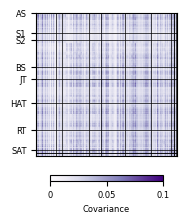

In [11]:
fig, axes = plt.subplots(figsize=(5*cm,6*cm))
indices_features = np.argsort(features.cluster.values)
x_ticks_list = []
sortedf = features.cluster.values[indices_features] 

im = axes.imshow(X, aspect='auto',cmap='Purples',vmax=0.1)
for i in range(11):
    ins = np.squeeze(np.argwhere(sortedf == i))
    axes.axhline(ins[-1], c='k',lw=lw)
    axes.axvline(ins[-1], c='k',lw=lw)
    x_ticks_list.append(ins[0])

cbar= fig.colorbar(im, orientation='horizontal',shrink=0.8,pad=0.1)
cbar.set_label('Covariance', size=f_size)
cbar.ax.tick_params(labelsize=f_size)
cbar.set_ticks([0, 0.05, 0.1])
cbar.set_ticklabels([0, 0.05, 0.1], fontsize=f_size)

x_label_list=catname
axes.set_yticks(x_ticks_list[:8])
axes.set_yticklabels(x_label_list[:8],fontsize=f_size)
axes.set_xticklabels([],fontsize=f_size)
axes.set_xticks([])
plt.tight_layout()

plt.savefig('{}/cov_matrix_dist.pdf'.format(figs_path),format="pdf", bbox_inches="tight", dpi=dpi)
plt.savefig('{}/cov_matrix_dist.png'.format(figs_path),format="png", bbox_inches="tight", dpi=dpi)
